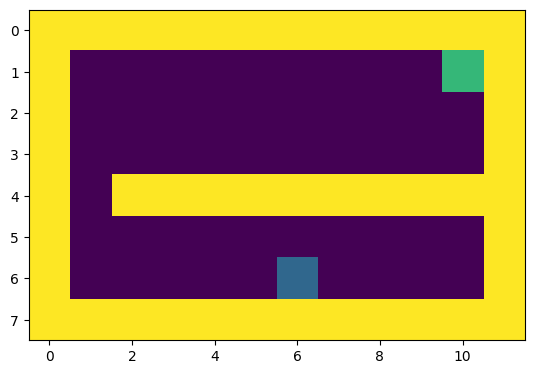

In [264]:
import matplotlib.pyplot as plt
import numpy as np

map = np.array([0]*8*12).reshape(8,12)
map[6,6] = 1 #start
map[1,10] = 2 #goal
map[0,:] = 3
map[-1,:] = 3
map[:,0] = 3
map[:,-1] = 3
map[4,2:] = 3

def show_(map):
    showing = map.copy().reshape(8,12,1)
    plt.imshow(showing)
    plt.show()
    
show_(map)

In [265]:
def pi(s):
    max = 0
    arg = -1
    for i in range(4):
        if q[tuple(s.tolist()+[i])] > max:
            max = q[tuple(s.tolist()+[i])]
            arg = i
    if arg == -1:
        return np.random.randint(4)
    else:
        if np.random.randint(10)<1:
            return np.random.randint(4)
        else:
            return arg

In [266]:
n = 1 #시간차 학습
m = 50 #계획단계

map[4,10] = 3
map[4,1] = 0
#반복 for 평균 시작
q = np.array([0.0]*8*12*4).reshape(8,12,4)

go = np.array([[0,1],[-1,0],[0,-1],[1,0]])

model = np.array([0]*8*12*4,dtype=list)

for i in range(8*12*4):
    model[i] = [-1]
model = model.reshape(8,12,4) # q에 대해서 다음 상태,보상 리스트로 저장(넘파이 X)
help = np.array([-1],dtype=list)
help[0] = [-1]

r_sum = 0.0
r_sum_list = []

for h in range(100000):
    print(h)
    if len(r_sum_list) >= 6000:
        break
    me = np.array([6,6])
    a_list = []
    me_list = [me.copy()]
    r_list = [0]
    
    end = -1
      
    for i in range(1,50000):
        r_sum_list += [r_sum]
        if len(r_sum_list) == 3000:
            map[4,10] = 0
            map[4,1] = 3
            
        if end == -1:
            a = pi(me)
            a_list += [a]
                    
            if map[tuple(me + go[a])] != 3:
                me += go[a]
            me_list += [me.copy()]
                
            if map[tuple(me)] == 2:
                r_list += [1]
                r_sum += 1
                end = 0
            else:
                r_list += [0]
                
            model[tuple(me_list[-2].tolist()+[a])] = me.tolist()+[r_list[-1]]
            
        if i >= n:
            g = 0
            for j in range(n - 1 - end):
                g = r_list[i-j] + 0.95*g
            max = -1
            arg = -1
            for j in range(4):
                if q[tuple(me.tolist()+[j])] >= max:
                    max = q[tuple(me.tolist()+[j])]
                    arg = j
            q[tuple(me_list[i-n].tolist()+[a_list[i-n]])] = q[tuple(me_list[i-n].tolist()+[a_list[i-n]])] + 0.1*(g + 0.95*q[tuple(me.tolist()+[arg])] - q[tuple(me_list[i-n].tolist()+[a_list[i-n]])])
    
            
        if end >= 0:
            end += 1
            
        for j in range(m):
            where = np.array(np.where(model != help)).transpose(1,0)
            which = np.random.randint(where.shape[0])
            max = -1
            arg = -1
            for k in range(4):
                if q[tuple(model[tuple(where[which])][:2]+[k])] >= max:
                    max = q[tuple(model[tuple(where[which])][:2]+[k])]
                    arg = k
            q[tuple(where[which])] = q[tuple(where[which])] + 0.1*(model[tuple(where[which])][2] + 0.95*q[tuple(model[tuple(where[which])][:2]+[arg])] - q[tuple(where[which])])

        if end == n:
            break

r_sum_np = np.array(r_sum_list)[:6000]
#반복 for 평균 끝

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


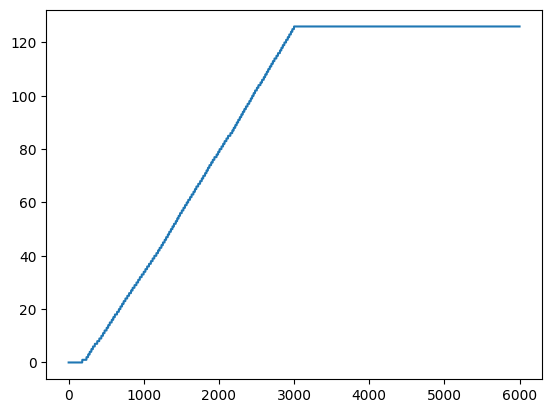

In [267]:
plt.plot(r_sum_np)
plt.show()

In [268]:
#반복 for 평균 시작
for g in range(19):
    
    map[4,10] = 3
    map[4,1] = 0
    
    q = np.array([0.0]*8*12*4).reshape(8,12,4)

    go = np.array([[0,1],[-1,0],[0,-1],[1,0]])

    model = np.array([0]*8*12*4,dtype=list)

    for i in range(8*12*4):
        model[i] = [-1]
    model = model.reshape(8,12,4) # q에 대해서 다음 상태,보상 리스트로 저장(넘파이 X)
    help = np.array([-1],dtype=list)
    help[0] = [-1]

    r_sum = 0.0
    r_sum_list = []

    for h in range(100000):
        
        if len(r_sum_list) >= 6000:
            break
        me = np.array([6,6])
        a_list = []
        me_list = [me.copy()]
        r_list = [0]
        
        end = -1
        
        for i in range(1,50000):
            r_sum_list += [r_sum]
            if len(r_sum_list) == 3000:
                map[4,10] = 0
                map[4,1] = 3
                
            if end == -1:
                a = pi(me)
                a_list += [a]
                        
                if map[tuple(me + go[a])] != 3:
                    me += go[a]
                me_list += [me.copy()]
                    
                if map[tuple(me)] == 2:
                    r_list += [1]
                    r_sum += 1
                    end = 0
                else:
                    r_list += [0]
                    
                model[tuple(me_list[-2].tolist()+[a])] = me.tolist()+[r_list[-1]]
                
            if i >= n:
                g = 0
                for j in range(n - 1 - end):
                    g = r_list[i-j] + 0.95*g
                max = -1
                arg = -1
                for j in range(4):
                    if q[tuple(me.tolist()+[j])] >= max:
                        max = q[tuple(me.tolist()+[j])]
                        arg = j
                q[tuple(me_list[i-n].tolist()+[a_list[i-n]])] = q[tuple(me_list[i-n].tolist()+[a_list[i-n]])] + 0.1*(g + 0.95*q[tuple(me.tolist()+[arg])] - q[tuple(me_list[i-n].tolist()+[a_list[i-n]])])
        
                
            if end >= 0:
                end += 1
                
            for j in range(m):
                where = np.array(np.where(model != help)).transpose(1,0)
                which = np.random.randint(where.shape[0])
                max = -1
                arg = -1
                for k in range(4):
                    if q[tuple(model[tuple(where[which])][:2]+[k])] >= max:
                        max = q[tuple(model[tuple(where[which])][:2]+[k])]
                        arg = k
                q[tuple(where[which])] = q[tuple(where[which])] + 0.1*(model[tuple(where[which])][2] + 0.95*q[tuple(model[tuple(where[which])][:2]+[arg])] - q[tuple(where[which])])

            if end == n:
                break

    r_sum_np += np.array(r_sum_list)[:6000]
#반복 for 평균 끝

In [269]:
n = 1 #시간차 학습
m = 50 #계획단계

map[4,10] = 3
map[4,1] = 0
#반복 for 평균 시작
q = np.array([0.0]*8*12*4).reshape(8,12,4)
q_when = np.array([0.0]*8*12*4).reshape(8,12,4)

go = np.array([[0,1],[-1,0],[0,-1],[1,0]])

model = np.array([0]*8*12*4,dtype=list)

for i in range(8*12*4):
    model[i] = [-1]
model = model.reshape(8,12,4) # q에 대해서 다음 상태,보상 리스트로 저장(넘파이 X)
help = np.array([-1],dtype=list)
help[0] = [-1]

r_sum = 0.0
r_sum_list = []

for h in range(100000):
    
    if len(r_sum_list) >= 6000:
        break
    me = np.array([6,6])
    a_list = []
    me_list = [me.copy()]
    r_list = [0]
    
    end = -1
      
    for i in range(1,50000):
        r_sum_list += [r_sum]
        if len(r_sum_list) == 3000:
            map[4,10] = 0
            map[4,1] = 3
            
        if end == -1:
            a = pi(me)
            a_list += [a]
            
            q_when[tuple(me.tolist()+[a])] = len(r_sum_list)
                    
            if map[tuple(me + go[a])] != 3:
                me += go[a]
            me_list += [me.copy()]
                
            if map[tuple(me)] == 2:
                r_list += [1]
                r_sum += 1
                end = 0
            else:
                r_list += [0]
                
            model[tuple(me_list[-2].tolist()+[a])] = me.tolist()+[r_list[-1]]
            
        if i >= n:
            g = 0
            for j in range(n - 1 - end):
                g = r_list[i-j] + 0.95*g
            max = -1
            arg = -1
            for j in range(4):
                if q[tuple(me.tolist()+[j])] >= max:
                    max = q[tuple(me.tolist()+[j])]
                    arg = j
            q[tuple(me_list[i-n].tolist()+[a_list[i-n]])] = q[tuple(me_list[i-n].tolist()+[a_list[i-n]])] + 0.1*(g + 0.95*q[tuple(me.tolist()+[arg])] - q[tuple(me_list[i-n].tolist()+[a_list[i-n]])])
    
            
        if end >= 0:
            end += 1
            
        for j in range(m):
            where = np.array(np.where(model != help)).transpose(1,0)
            which = np.random.randint(where.shape[0])
            max = -1
            arg = -1
            for k in range(4):
                if q[tuple(model[tuple(where[which])][:2]+[k])] >= max:
                    max = q[tuple(model[tuple(where[which])][:2]+[k])]
                    arg = k
            if h < 1:
                q[tuple(where[which])] = q[tuple(where[which])] + 0.1*(model[tuple(where[which])][2] + 0*((len(r_sum_list) - q_when[tuple(where[which])])**(1/2)) + 0.95*q[tuple(model[tuple(where[which])][:2]+[arg])] - q[tuple(where[which])])
            else:
                q[tuple(where[which])] = q[tuple(where[which])] + 0.1*(model[tuple(where[which])][2] + 1e-7*((len(r_sum_list) - q_when[tuple(where[which])])**(1/2)) + 0.95*q[tuple(model[tuple(where[which])][:2]+[arg])] - q[tuple(where[which])])
            
        if end == n:
            break

r_sum_np1 = np.array(r_sum_list)[:6000]
#반복 for 평균 끝

In [270]:
#반복 for 평균 시작
for g in range(19):
    
    map[4,10] = 3
    map[4,1] = 0
    
    q = np.array([0.0]*8*12*4).reshape(8,12,4)
    q_when = np.array([0.0]*8*12*4).reshape(8,12,4)

    go = np.array([[0,1],[-1,0],[0,-1],[1,0]])

    model = np.array([0]*8*12*4,dtype=list)

    for i in range(8*12*4):
        model[i] = [-1]
    model = model.reshape(8,12,4) # q에 대해서 다음 상태,보상 리스트로 저장(넘파이 X)
    help = np.array([-1],dtype=list)
    help[0] = [-1]

    r_sum = 0.0
    r_sum_list = []

    for h in range(100000):
        
        if len(r_sum_list) >= 6000:
            break
        me = np.array([6,6])
        a_list = []
        me_list = [me.copy()]
        r_list = [0]
        
        end = -1
        
        for i in range(1,50000):
            r_sum_list += [r_sum]
            if len(r_sum_list) == 3000:
                map[4,10] = 0
                map[4,1] = 3
                
            if end == -1:
                a = pi(me)
                a_list += [a]
                
                q_when[tuple(me.tolist()+[a])] = len(r_sum_list)
                        
                if map[tuple(me + go[a])] != 3:
                    me += go[a]
                me_list += [me.copy()]
                    
                if map[tuple(me)] == 2:
                    r_list += [1]
                    r_sum += 1
                    end = 0
                else:
                    r_list += [0]
                    
                model[tuple(me_list[-2].tolist()+[a])] = me.tolist()+[r_list[-1]]
                
            if i >= n:
                g = 0
                for j in range(n - 1 - end):
                    g = r_list[i-j] + 0.95*g
                max = -1
                arg = -1
                for j in range(4):
                    if q[tuple(me.tolist()+[j])] >= max:
                        max = q[tuple(me.tolist()+[j])]
                        arg = j
                q[tuple(me_list[i-n].tolist()+[a_list[i-n]])] = q[tuple(me_list[i-n].tolist()+[a_list[i-n]])] + 0.1*(g + 0.95*q[tuple(me.tolist()+[arg])] - q[tuple(me_list[i-n].tolist()+[a_list[i-n]])])
                
                
            if end >= 0:
                end += 1
                
            for j in range(m):
                where = np.array(np.where(model != help)).transpose(1,0)
                which = np.random.randint(where.shape[0])
                max = -1
                arg = -1
                for k in range(4):
                    if q[tuple(model[tuple(where[which])][:2]+[k])] >= max:
                        max = q[tuple(model[tuple(where[which])][:2]+[k])]
                        arg = k
                if h < 1:
                    q[tuple(where[which])] = q[tuple(where[which])] + 0.1*(model[tuple(where[which])][2] + 0*((len(r_sum_list) - q_when[tuple(where[which])])**(1/2)) + 0.95*q[tuple(model[tuple(where[which])][:2]+[arg])] - q[tuple(where[which])])
                else:
                    q[tuple(where[which])] = q[tuple(where[which])] + 0.1*(model[tuple(where[which])][2] + 1e-7*((len(r_sum_list) - q_when[tuple(where[which])])**(1/2)) + 0.95*q[tuple(model[tuple(where[which])][:2]+[arg])] - q[tuple(where[which])])
            
            if end == n:
                break

    r_sum_np1 += np.array(r_sum_list)[:6000]
#반복 for 평균 끝

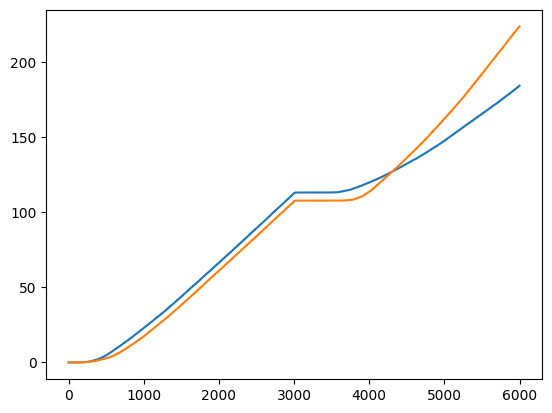

In [271]:
plt.plot(r_sum_np[:6000]/20)
plt.plot(r_sum_np1[:6000]/20)
plt.show()